<a href="https://colab.research.google.com/github/98308289/sanchit-ulnn/blob/main/FRUIT_CLASSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os

# Path to the uploaded zip file
zip_path = '/content/archive (2).zip'
extract_path = '/content/fruits_dataset/'

# Unzip the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List the files to check the structure of the extracted files
os.listdir(extract_path)


['Fruits Classification']

In [ ]:
# List the subdirectories inside the extracted folder
os.listdir('/content/fruits_dataset')


['Fruits Classification']

In [ ]:
# List the subdirectories inside 'Fruits Classification'
os.listdir('/content/fruits_dataset/Fruits Classification')


['valid', 'train', 'test', 'data_splitting.py']

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Path to the train and validation directories
train_dir = '/content/fruits_dataset/Fruits Classification/train'  # Corrected path
valid_dir = '/content/fruits_dataset/Fruits Classification/valid'  # Corrected path

# Parameters for image resizing and batching
img_height = 224  # Resize images to 224x224
img_width = 224
batch_size = 32

# Load the training dataset
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical',  # For multi-class classification
)

# Load the validation dataset
valid_dataset = image_dataset_from_directory(
    valid_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical',  # For multi-class classification
)

# Cache and prefetch the datasets for performance
train_dataset = train_dataset.cache().prefetch(tf.data.experimental.AUTOTUNE)
valid_dataset = valid_dataset.cache().prefetch(tf.data.experimental.AUTOTUNE)


Found 9700 files belonging to 5 classes.
Found 200 files belonging to 5 classes.


In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16

# Load the VGG16 base model (pre-trained, excluding top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base model so its weights won't be updated during training
base_model.trainable = False

# Build the custom model on top of VGG16
model = models.Sequential([
    base_model,  # Add the VGG16 base model
    layers.Flatten(),  # Flatten the 3D tensor to 1D for fully connected layers
    layers.Dense(512, activation='relu'),  # Fully connected layer with 512 neurons
    layers.Dropout(0.5),  # Dropout layer for regularization
    layers.Dense(5, activation='softmax')  # Output layer with 5 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,562,821 (105.14 MB)

 Trainable params: 12,848,133 (49.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Train the model
history = model.fit(
    train_dataset,
    epochs=10,  # Number of epochs
    validation_data=valid_dataset  # Validation data for evaluating during training
)


Epoch 1/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 78s 213ms/step - accuracy: 0.5471 - loss: 14.0960 - val_accuracy: 0.6700 - val_loss: 1.0537
Epoch 2/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 49s 160ms/step - accuracy: 0.7076 - loss: 0.9508 - val_accuracy: 0.6600 - val_loss: 0.9156
Epoch 3/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 48s 158ms/step - accuracy: 0.7301 - loss: 0.8208 - val_accuracy: 0.7550 - val_loss: 0.8124
Epoch 4/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 49s 161ms/step - accuracy: 0.7607 - loss: 0.7466 - val_accuracy: 0.7250 - val_loss: 0.8049
Epoch 5/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 48s 159ms/step - accuracy: 0.7787 - loss: 0.6753 - val_accuracy: 0.7650 - val_loss: 0.6649
Epoch 6/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 49s 160ms/step - accuracy: 0.7885 - loss: 0.6353 - val_accuracy: 0.7550 - val_loss: 0.7128
Epoch 7/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 81s 155ms/step - accuracy: 0.8098 - loss: 0.5912 - val_accuracy: 0.7500 - val_loss: 0.6744
Epoch 8/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 82s 154ms/step - accuracy: 0.8124 - loss: 

In [ ]:
# Evaluate the model on the validation dataset
val_loss, val_acc = model.evaluate(valid_dataset)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.7823 - loss: 0.9006
Validation Loss: 0.7942695617675781
Validation Accuracy: 0.7900000214576721


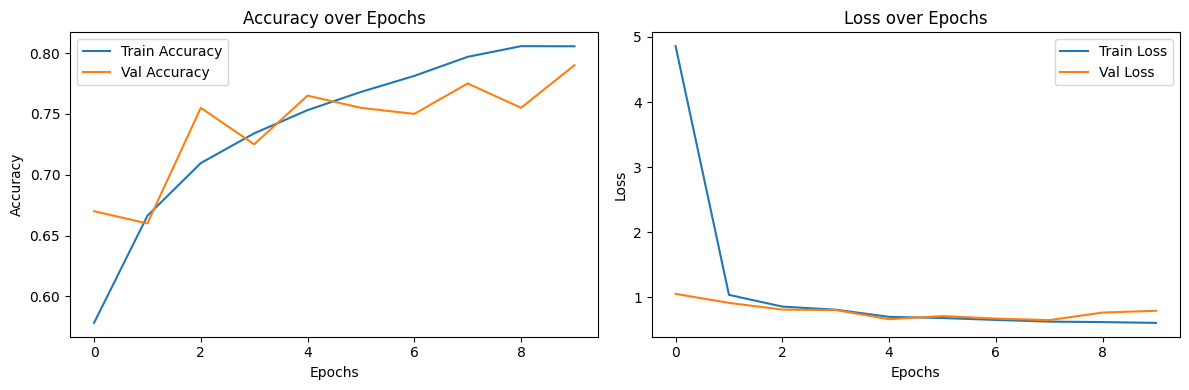

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Load the test dataset
test_dir = '/content/fruits_dataset/Fruits Classification/test'

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical',
    shuffle=False
)

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


Found 100 files belonging to 5 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step - accuracy: 0.8270 - loss: 0.6656
Test Loss: 0.5991412401199341
Test Accuracy: 0.8199999928474426


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted class: Apple


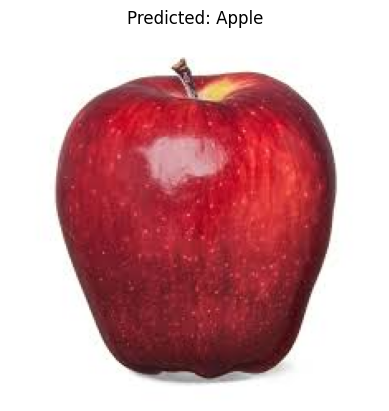

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Replace with your actual image name if it's different
img_path = '/content/apple.jpeg'

# Load and preprocess image
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Predict using the trained model
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])

# Print the predicted label
print(f"Predicted class: {class_names[predicted_class]}")

# Optional: show the image
plt.imshow(img)
plt.title(f"Predicted: {class_names[predicted_class]}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted class: Banana


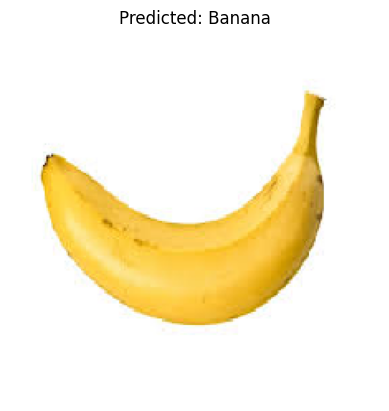

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Replace with your actual image name if it's different
img_path = '/content/banana.jpeg'

# Load and preprocess image
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Predict using the trained model
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])

# Print the predicted label
print(f"Predicted class: {class_names[predicted_class]}")

# Optional: show the image
plt.imshow(img)
plt.title(f"Predicted: {class_names[predicted_class]}")
plt.axis('off')
plt.show()



In [ ]:
model.save('fruit_classifier_model.h5')


In [ ]:
from google.colab import files
files.download('fruit_classifier_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>